#`This notebook is an Illustration to create a Simple Stochastic Gradient Descent Linear Model Classifier with Sklearn using Python 🐍`

For more information, check out the [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html). 

<img src='https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/120/openmoji/252/anatomical-heart_1fac0.png'>

## **Setup**
Let's setup the imports:  

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model, metrics, model_selection
from sklearn.metrics import confusion_matrix, classification_report 


%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.rcParams['figure.figsize'] = (13, 9)

plt.style.use('fivethirtyeight')

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED) 

# Exploratory Data Analysis
Let's load the Heart Disease UCI dataset which is uploaded on my Google Drive.

[The Dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

In [2]:
!gdown --id 1Hfgu_Tui5Tw2lWfJBOIV7TfVlI6uwiE0 

Downloading...
From: https://drive.google.com/uc?id=1Hfgu_Tui5Tw2lWfJBOIV7TfVlI6uwiE0
To: /content/heart_disease.csv
100% 11.3k/11.3k [00:00<00:00, 27.5MB/s]


Let's read the CVS file:

In [3]:
df = pd.read_csv('/content/heart_disease.csv') 

First few rows in the DataFrame:

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Shape of the DataFrame:

In [5]:
df.shape

(303, 14)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# `Let's now do some Data Visualization Using Seaborn and Matplotlib.`


Let's take a look at a distplot of the Age column:

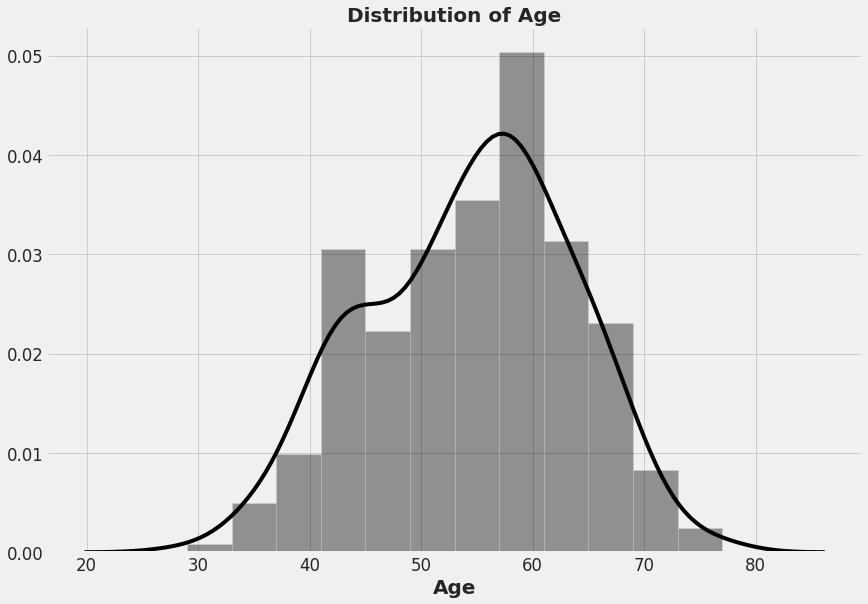

In [24]:
sns.distplot(df['age'], color = 'black')
plt.title('Distribution of Age', fontsize = 20, fontweight = 'bold')
plt.xlabel('Age', fontsize = 20, fontweight = 'bold')
plt.show() 

Let's take a look at a countplot of the Target column:

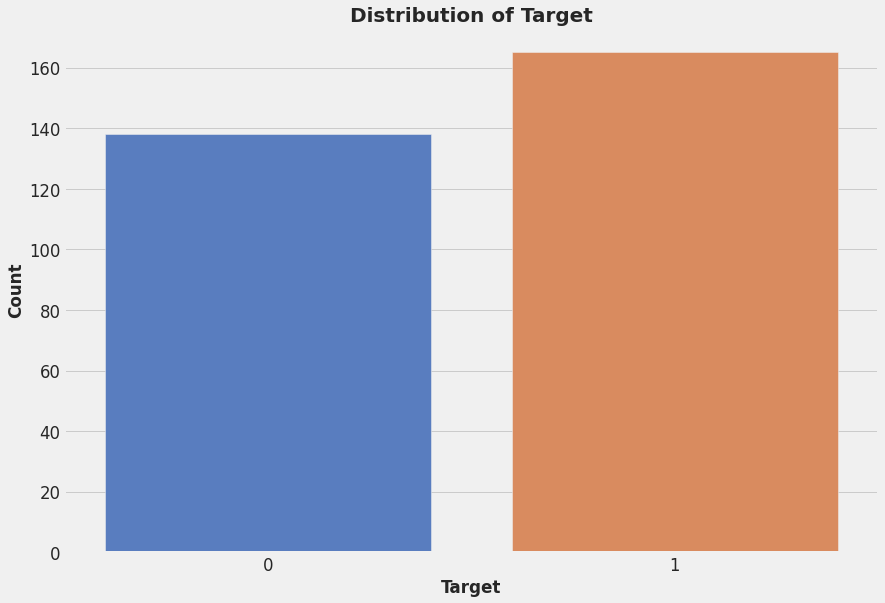

In [33]:
sns.countplot(df['target'], palette = 'muted')
plt.title('Distribution of Target', fontsize = 20, fontweight = 'bold')
plt.xlabel('Target', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

Let's take a look at a Pieplot of the Sex column:

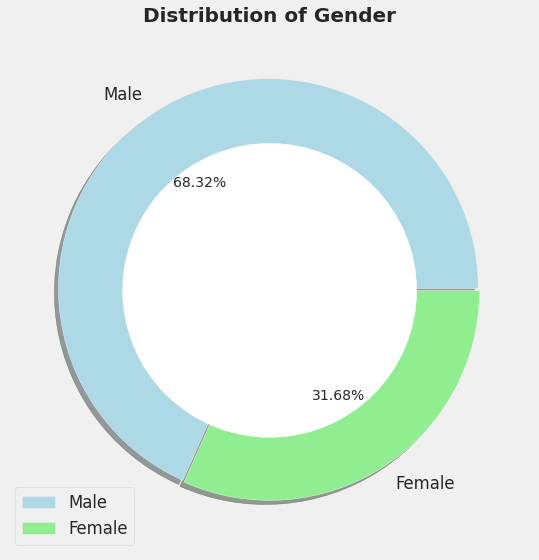

In [30]:
size = df['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0.01, 0]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')
#displays in percentage with exploding slice

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20, fontweight='bold')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

Let's take a look at a Violinplot of the cholesterol column:

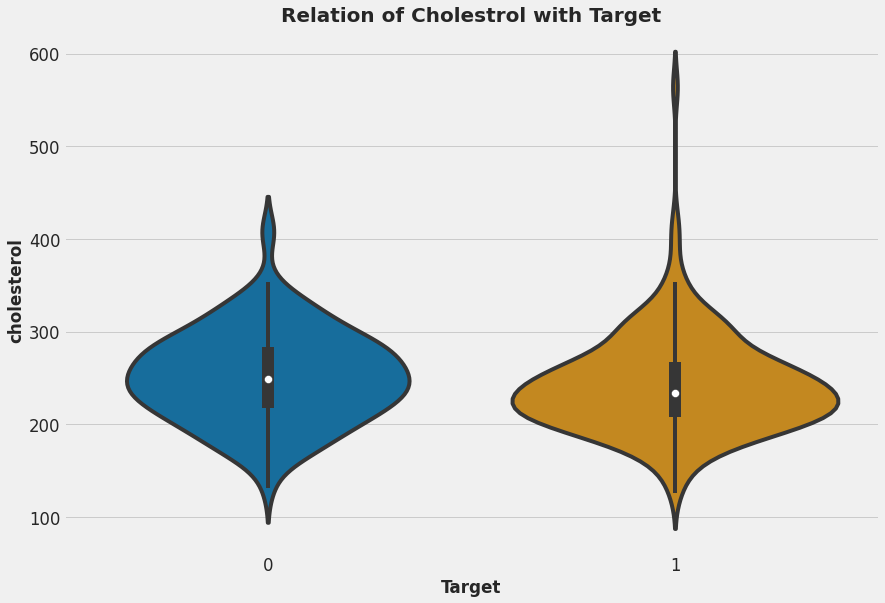

In [40]:
sns.violinplot(df['target'], df['chol'], palette = 'colorblind')
plt.title('Relation of Cholestrol with Target', fontsize = 20, fontweight = 'bold')
plt.xlabel('Target', fontweight='bold')
plt.ylabel('cholesterol', fontweight='bold')
plt.show();

Let's take a look at a Crosstab plot of the Age column with respect to Target column:

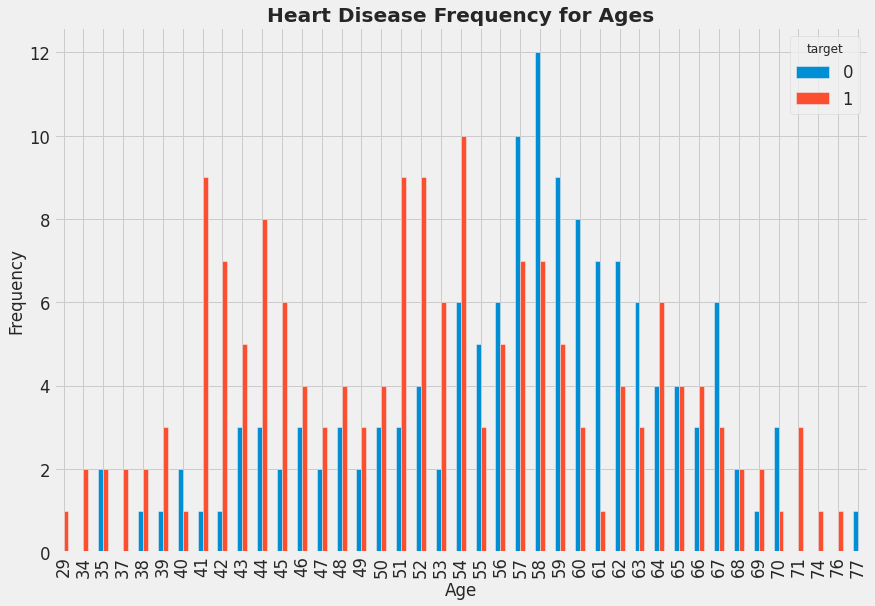

In [39]:
pd.crosstab(df['age'], df['target']).plot(kind="bar")
plt.title('Heart Disease Frequency for Ages', fontweight = 'bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show();

Let's take a look at a Crosstab plot of the Chest Pain column with respect to Target column:

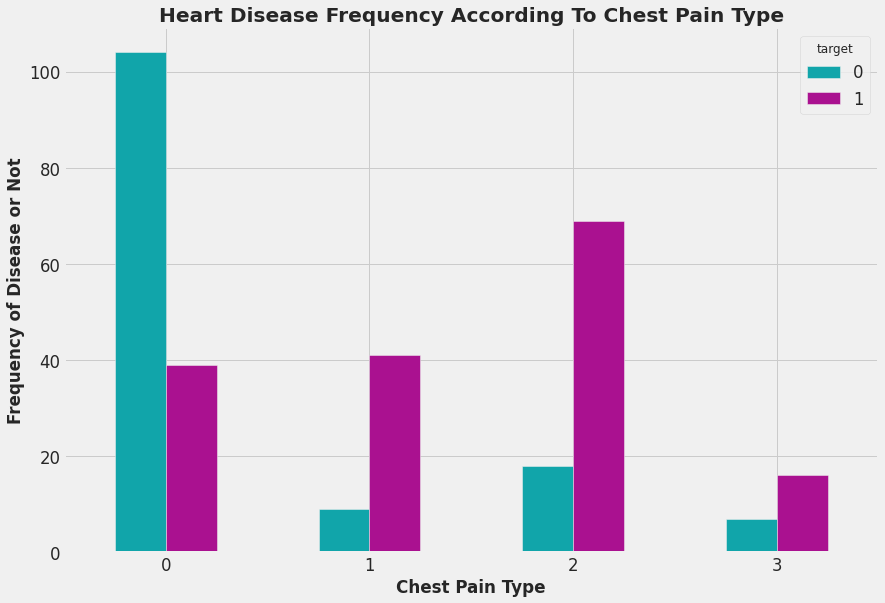

In [41]:
pd.crosstab(df.cp, df.target).plot(kind="bar",color=['#11A5AA','#AA1190'])
plt.title('Heart Disease Frequency According To Chest Pain Type', fontweight = 'bold')
plt.xlabel('Chest Pain Type', fontweight = 'bold')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not', fontweight = 'bold')
plt.show();

Let's take a look at a Crosstab plot of the Sex column with respect to Target column:

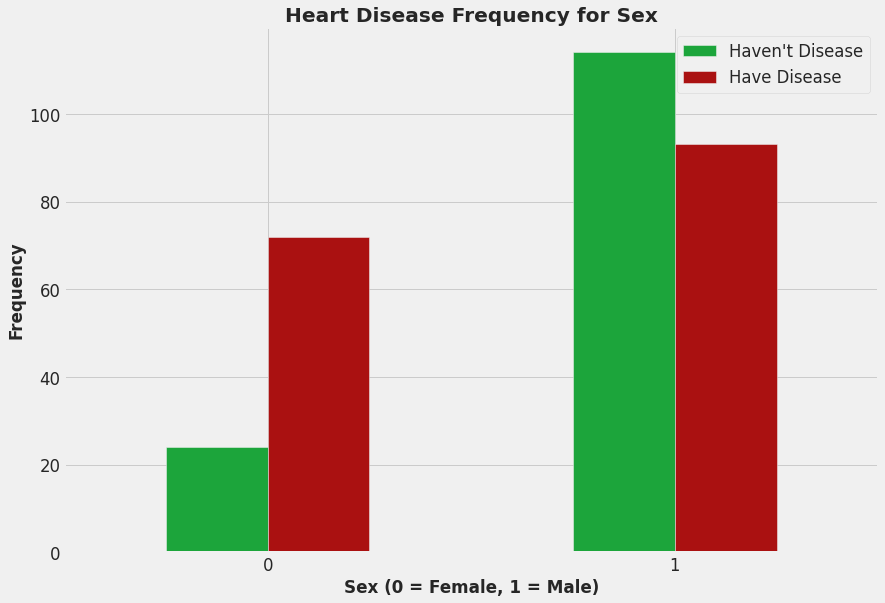

In [42]:
pd.crosstab(df.sex, df.target).plot(kind="bar",color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Sex', fontweight='bold')
plt.xlabel('Sex (0 = Female, 1 = Male)', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency', fontweight='bold')
plt.show();

Let's take a look at a Crosstab plot of the Slope column with respect to Target column:

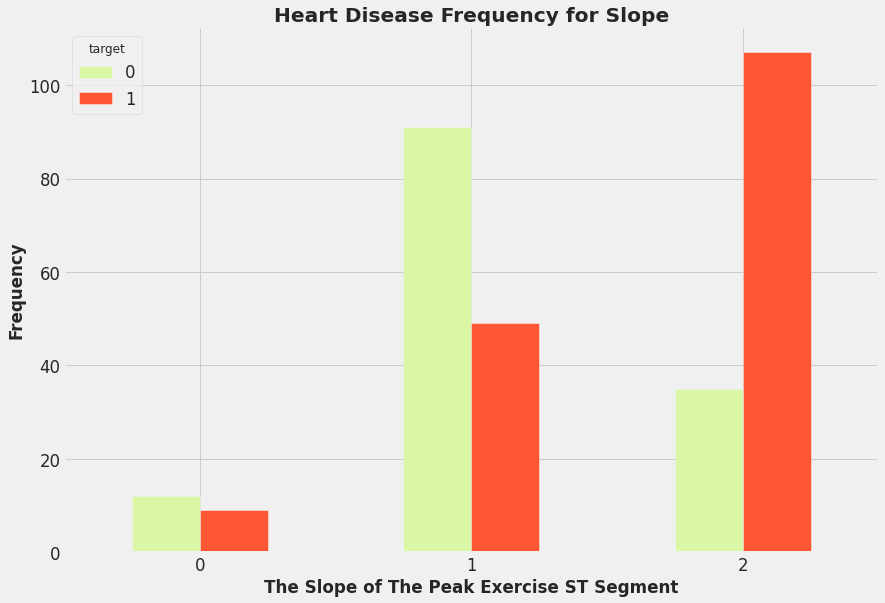

In [43]:
pd.crosstab(df.slope, df.target).plot(kind="bar",color=['#DAF7A6','#FF5733'])
plt.title('Heart Disease Frequency for Slope', fontweight='bold')
plt.xlabel('The Slope of The Peak Exercise ST Segment',fontweight='bold')
plt.xticks(rotation = 0)
plt.ylabel('Frequency', fontweight='bold')
plt.show();

Let's take a look at a Crosstab plot of the Sex column with respect to Exercise Induced Angina column:

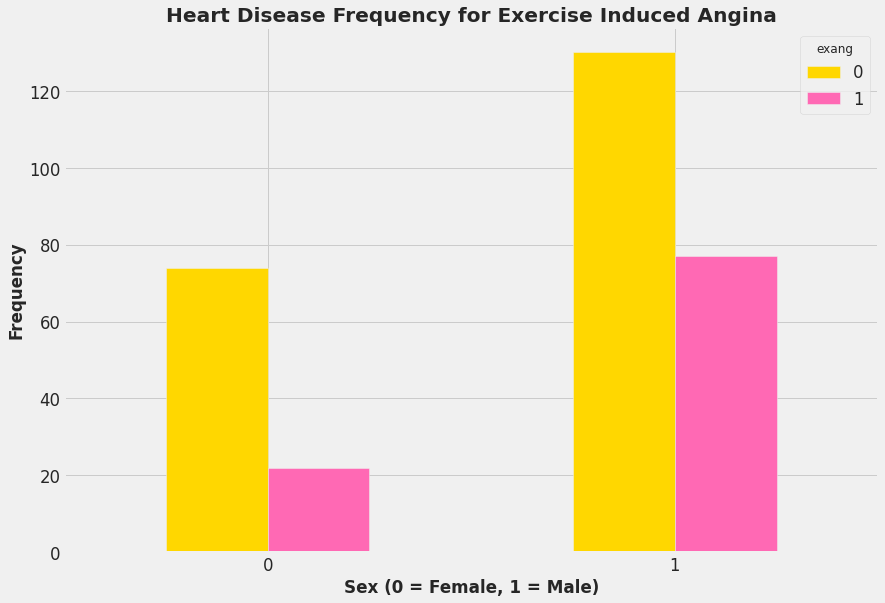

In [44]:
pd.crosstab(df.sex, df.exang).plot(kind="bar",color=['#FFD700','#FF69B4'])
plt.title('Heart Disease Frequency for Exercise Induced Angina', fontweight='bold')
plt.xlabel('Sex (0 = Female, 1 = Male)', fontweight='bold')
plt.xticks(rotation = 0)
plt.ylabel('Frequency', fontweight='bold')
plt.show(); 

Let's take a look at a Barplot of the Chest Pain column with respect to Target column:

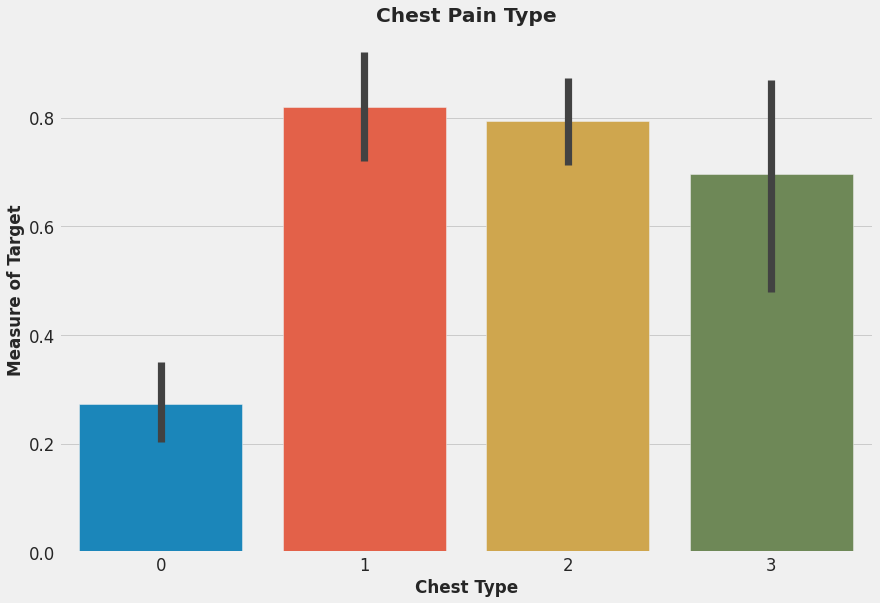

In [45]:
sns.barplot(df["cp"],df['target'], alpha=1)
plt.title("Chest Pain Type", fontweight = 'bold')
plt.xlabel('Chest Type', fontweight='bold')
plt.ylabel('Measure of Target', fontweight='bold');

# Data Preprocessing 

Here are the requirements:

* Check if the DataFrame has nullValues.
* Check Correlation Coefficients.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


WooHOO! The dataset has no null values.

Let's write a helper function to elaborate the columns in our DataFrame:

In [47]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina,\
 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," \
 serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","\
 resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","\
 exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","\
 the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","\
 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i]) 

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			  serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			 resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			 exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			 the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [48]:
df["target"].unique()

array([1, 0])

Let's see the correlations.

Corr() is used to find the pairwise correlation of all columns in the dataframe:

In [49]:
print(df.corr(method='kendall')["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.430506
ca          0.430124
thal        0.392595
oldpeak     0.361731
slope       0.361406
thalach     0.352609
sex         0.280937
age         0.197857
restecg     0.147678
trestbps    0.102064
chol        0.099131
fbs         0.028046
Name: target, dtype: float64


In [50]:
x_data = df.drop(["target"], axis=1) 
y = df["target"].values   

Our DataFrame now contains all the columns except the target column:

In [51]:
x_data.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
x_data.shape

(303, 13)

In [11]:
y.shape

(303,)

Let's normalize the inputs and scale them down to 0 and 1:

In [53]:
x_data = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [54]:
x_data.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


Let's split our DataSet into Training and Testing sets

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2,random_state=0) 

In [56]:
x_train.shape

(242, 13)

In [57]:
x_test.shape

(61, 13)

In [58]:
y_train.shape

(242,)

In [59]:
y_test.shape

(61,)

Now, Let's build our SGDClassifier for Heart Disease Prediction:

In [62]:
sgd = SGDClassifier(loss = 'squared_loss',penalty=None, learning_rate='optimal', max_iter=3000, shuffle=False, verbose=0)
sgd.fit(x_train, y_train) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='squared_loss',
              max_iter=3000, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=None, shuffle=False, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Running the Predict funtion:

In [63]:
y_pred = sgd.predict(x_test) 
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [64]:
print("Training Accuracy :", sgd.score(x_train, y_train))
print("Testing Accuracy :", sgd.score(x_test, y_test))

Training Accuracy : 0.7148760330578512
Testing Accuracy : 0.639344262295082


WooOops! The model is quite bad. But the main intuition of this notebook is to provide a glimpse on SGDClassifier.

This notebook is mainly focused on EDA.

In [65]:
pred_table = pd.DataFrame({'Actual':  y_test, 'predicted': y_pred})   

In [66]:
pred_table.head() 

,Actual,predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0


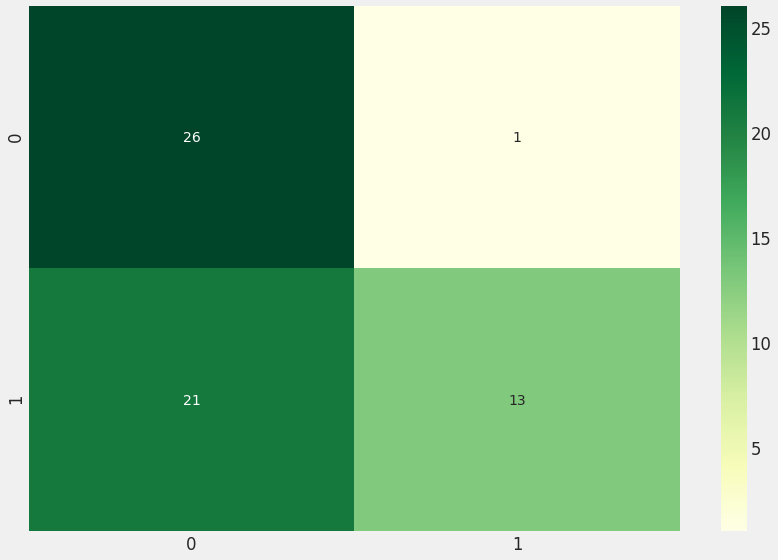

In [67]:
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot = True, cmap = 'YlGn'); 

In [68]:
cr = classification_report(y_test, y_pred) 
print(cr)

              precision    recall  f1-score   support

           0       0.55      0.96      0.70        27
           1       0.93      0.38      0.54        34

    accuracy                           0.64        61
   macro avg       0.74      0.67      0.62        61
weighted avg       0.76      0.64      0.61        61



## Summary

You now have learned to:

* In-depth understanding of Exploratory Data Analysis
* Intuitively understand what SGDClassifier is
* Preprocess data for the classifier
* Evaluate the model on test data


## References
- [Simple Linear Regression](https://machinelearningmastery.com/simple-linear-regression-tutorial-for-machine-learning/)
-  [EDA](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- [Multiple Linear Regression](https://www.investopedia.com/terms/m/mlr.asp)
- [Paper](https://arxiv.org/ftp/arxiv/papers/1807/1807.01104.pdf)